In [21]:
# %load kinase_single_well_spectra_experiment


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


filename = ['p38_Sta_ab_gain75_20190329_105335.xml']

datapath = 'infinite_results'


# In[16]:


concentrations = np.array([2.00e-07, 3.04e-07, 4.62e-07,
                           7.02e-07, 1.0700e-06, 1.620e-06,
                           2.470e-06, 3.750e-06, 5.700e-06,
                           8.660e-06, 1.320e-05, 2.000e-05])


# In[17]:

reads = list()
nreads = len(filename)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filename[read]))
    reads.append(read)

## Ex 296 nm

In [6]:
Stauro_prot = np.zeros([12, 65])
Stauro_buff = np.zeros([12, 65])
ncol = 12

label = 'ex296_scan_top_gain75'

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    
    measurements_prot = list(reads[0]['ex296_scan_top_gain75'][prot_well_name].values())
    measurements_prot = [i if i != 'OVER' else 70000 for i in measurements_prot] 
    measurements_buff = list(reads[0]['ex296_scan_top_gain75'][buff_well_name].values())
    measurements_buff = [i if i != 'OVER' else 0 for i in measurements_buff] 
    print(measurements_prot)
    
    Stauro_prot[well] = np.array(measurements_prot)
    Stauro_buff[well] = np.array(measurements_buff)

['4066', '2385064', '2003709', '1643787', '1323919', '1117050', '80715', '61739', '50855', '42930', '35759', '30123', '24902', '20686', '18405', '16119', '13796', '17685', '44029', '91966', '104494', '76452', '53955', '54484', '62396', '51526', '36556', '26892', '24875', '22524', '16914', '11698', '8361', '6835', '5712', '4464', '3277', '2608', '2362', '2211', '2143', '2121', '2079', '2073', '2061', '2054', '2014', '2005', '1968', '1883', '1781', '1687', '1577', '1474', '1381', '1260', '1174', '1068', '972', '873', '792', '708', '622', '571', '505']
['3025', '2083411', '2003319', '1623226', '1328858', '1099797', '94811', '67823', '57690', '47250', '39274', '33512', '27735', '23348', '20401', '17736', '15094', '18561', '42197', '84602', '93172', '68286', '46818', '48647', '54862', '44390', '30788', '22545', '20774', '19013', '14472', '9696', '6948', '5698', '4894', '3749', '2679', '2097', '1813', '1685', '1591', '1524', '1465', '1395', '1369', '1343', '1307', '1265', '1228', '1176', '11

## Plot fluorescence across all 65 wavelengths

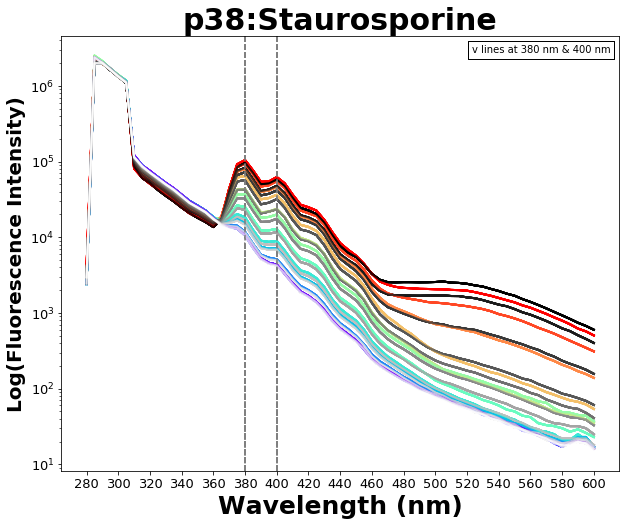

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

ncol=12
index = 0

# Plot fluorescence
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    x_values = list(reads[0][label][prot_well_name].keys())
    color = cm.rainbow(np.linspace(0,1,12))
    gray = cm.Greys(np.linspace(0,1,12))
    color = np.flip(color,axis=0)
    gray = np.flip(gray,axis=0)
    for read, c in zip(Stauro_prot, color):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.75)
    for read, c in zip(Stauro_buff, gray):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.75)
    axes.xaxis.set_major_locator(plt.MaxNLocator(20))
    axes.axvline(x=20, ymin=0, ymax=1, linestyle='--', color='0.5')
    axes.axvline(x=24, ymin=0, ymax=1, linestyle='--', color='0.5')
    

    plt.title('p38:Staurosporine', fontsize=30, fontweight='bold')
    plt.xlabel('Wavelength (nm)', fontsize=25, fontweight='bold')
    plt.ylabel('Log(Fluorescence Intensity)', fontsize=20, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=13)
    
    anchored_text = AnchoredText('v lines at 380 nm & 400 nm' ,  loc='upper right', prop=dict(size=10))
    axes.add_artist(anchored_text)

fig.savefig('20190329_gain75_stauro_p38_buff_spectra_log_y.pdf', bbox_inches='tight', dpi=300)

## Overlap plot with Sonya's 2016 data

In [5]:
filename_SMH = ['p38_Sta_ab_20161220_112406.xml']

datapath = 'infinite_results'

reads_SMH = list()
nreads = len(filename_SMH)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filename_SMH[read]))
    reads_SMH.append(read)
    
print(reads_SMH)

[{'ex280_scan_top_gain100': {'A1': {'280': 'OVER', '285': 'OVER', '290': 'OVER', '295': '53579', '300': '22106', '305': '29368', '310': '32529', '315': '26657', '320': '21073', '325': '19389', '330': '16877', '335': '14064', '340': '11545', '345': '9349', '350': '7726', '355': '6347', '360': '5572', '365': '7782', '370': '22951', '375': '48474', '380': '64801', '385': '54634', '390': '42619', '395': '40494', '400': '44192', '405': '39054', '410': '31705', '415': '24373', '420': '20618', '425': '18757', '430': '15004', '435': '11333', '440': '8391', '445': '7199', '450': '5489', '455': '4311', '460': '3276', '465': '2712', '470': '2398', '475': '2220', '480': '2072', '485': '2033', '490': '2053', '495': '2062', '500': '2074', '505': '2144', '510': '2139', '515': '2188', '520': '2170', '525': '2199', '530': '2202', '535': '2044', '540': '1962', '545': '1858', '550': '1801', '555': '1680', '560': '1567', '565': '1463', '570': '1393', '575': '1259', '580': '1107', '585': '1021', '590': '89

In [6]:
Stauro_prot_SMH = np.zeros([12, 65])
Stauro_buff_SMH = np.zeros([12, 65])
ncol = 12

label = 'ex296_scan_top_gain100'

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    
    measurements_prot = list(reads_SMH[0]['ex296_scan_top_gain100'][prot_well_name].values())
    measurements_prot = [i if i != 'OVER' else 70000 for i in measurements_prot] 
    measurements_buff = list(reads_SMH[0]['ex296_scan_top_gain100'][buff_well_name].values())
    measurements_buff = [i if i != 'OVER' else 0 for i in measurements_buff] 
    
    Stauro_prot_SMH[well] = np.array(measurements_prot)
    Stauro_buff_SMH[well] = np.array(measurements_buff)

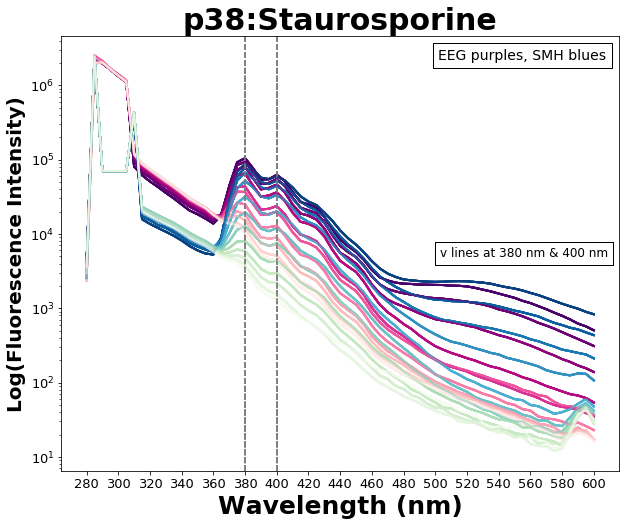

In [7]:
# buffer_color = current_palette[3]

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

ncol=12
index = 0

# Plot fluorescence
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    x_values = list(reads_SMH[0][label][prot_well_name].keys())
    color1 = cm.RdPu(np.linspace(0,1,12))
    color2 = cm.GnBu(np.linspace(0,1,12))
    color1 = np.flip(color1,axis=0)
    color2 = np.flip(color2,axis=0)
    for read, c in zip(Stauro_prot, color1):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.5)
    for read, c in zip(Stauro_prot_SMH, color2):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.5)
    axes.xaxis.set_major_locator(plt.MaxNLocator(20))

    plt.title('p38:Staurosporine', fontsize=30, fontweight='bold')
    plt.xlabel('Wavelength (nm)', fontsize=25, fontweight='bold')
    plt.ylabel('Log(Fluorescence Intensity)', fontsize=20, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=13)
    
    axes.axvline(x=20, ymin=0, ymax=1, linestyle='--', color='0.5')
    axes.axvline(x=24, ymin=0, ymax=1, linestyle='--', color='0.5')
    
    anchored_text = AnchoredText('EEG purples, SMH blues' ,  loc='upper right', prop=dict(size=14))
    axes.add_artist(anchored_text)
    anchored_text2 = AnchoredText('v lines at 380 nm & 400 nm', loc='center right', prop=dict(size=12))
    axes.add_artist(anchored_text2)
    

fig.savefig('20190329_overlap_stauro_p38_spectra_log_y.pdf', bbox_inches='tight', dpi=300)

## Plot fluo vs. concentration at em 380 nm and 400 nm

In [16]:
# 380 nm em data

Stauro_prot = np.zeros(12)
Stauro_buff = np.zeros(12)

ncol = 12

label = 'ex296_scan_top_gain75'

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    
    Stauro_prot[well] = reads[0][label][prot_well_name]['380']
    Stauro_buff[well] = reads[0][label][buff_well_name]['380']

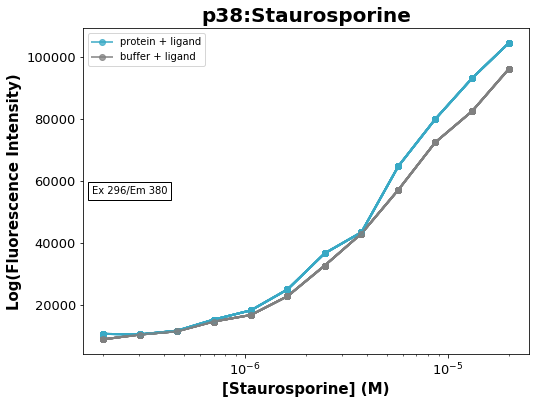

In [36]:
# plot 380 nm em data

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6))

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[6]
buffer_color = 'gray'

ncol=12
index = 0

for well in range(ncol):
    x_values = concentrations
    gray = cm.Greys
    plt.semilogx(x_values, np.flip(Stauro_prot, axis=0), c=protein_color, linestyle='solid', marker='o',linewidth=2, alpha=0.75)
    plt.semilogx(x_values, np.flip(Stauro_buff, axis=0), c=buffer_color, linestyle='solid', marker='o', linewidth=2, alpha=0.75)
    
plt.legend(['protein + ligand', 'buffer + ligand'], loc='upper left')
plt.title('p38:Staurosporine', fontsize=20, fontweight='bold')
plt.xlabel('[Staurosporine] (M)', fontsize=15, fontweight='bold')
plt.ylabel('Log(Fluorescence Intensity)', fontsize=15, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=13)
    
anchored_text = AnchoredText('Ex 296/Em 380' ,  loc='center left', prop=dict(size=10))
axes.add_artist(anchored_text)

fig.savefig('20190425_gain75_stauro_p38_buff_fluo_trace_380.pdf', bbox_inches='tight', dpi=300)

In [39]:
# 400 nm em data

Stauro_prot = np.zeros(12)
Stauro_buff = np.zeros(12)

ncol = 12

label = 'ex296_scan_top_gain75'

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    
    Stauro_prot[well] = reads[0][label][prot_well_name]['400']
    Stauro_buff[well] = reads[0][label][buff_well_name]['400']

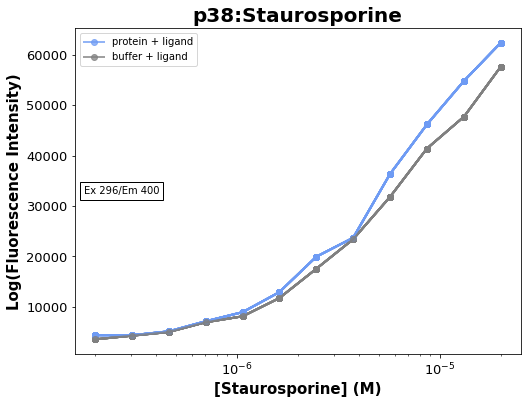

In [42]:
# plot 380 nm em data

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6))

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[7]
buffer_color = 'gray'

ncol=12
index = 0

for well in range(ncol):
    x_values = concentrations
    color = sns.set_palette('GnBu')
    gray = cm.Greys
    plt.semilogx(x_values, np.flip(Stauro_prot, axis=0), c=protein_color, linestyle='solid', marker='o',linewidth=2, alpha=0.75)
    plt.semilogx(x_values, np.flip(Stauro_buff, axis=0), c=buffer_color, linestyle='solid', marker='o', linewidth=2, alpha=0.75)
    
plt.legend(['protein + ligand', 'buffer + ligand'], loc='upper left')
plt.title('p38:Staurosporine', fontsize=20, fontweight='bold')
plt.xlabel('[Staurosporine] (M)', fontsize=15, fontweight='bold')
plt.ylabel('Log(Fluorescence Intensity)', fontsize=15, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=13)
    
anchored_text = AnchoredText('Ex 296/Em 400' ,  loc='center left', prop=dict(size=10))
axes.add_artist(anchored_text)

fig.savefig('20190425_gain75_stauro_p38_buff_fluo_trace_400.pdf', bbox_inches='tight', dpi=300)